In [50]:
import numpy as np
from matplotlib import pyplot as plt
from astroquery.sdss import SDSS
from scipy.optimize import curve_fit
import pandas as pd

In [58]:
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [225]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['legend.fontsize'] = 12

In [227]:
agn_df = pd.read_csv('data/table_dr17_qso_abs_krc213.csv')

In [229]:
print(agn_df.columns)

Index(['specObjID', 'ra', 'dec', 'u', 'err_u', 'g', 'err_g', 'r', 'err_r', 'i',
       'err_i', 'z', 'err_z', 'plate', 'fiberID', 'redshift', 'snMedian',
       'snMedian_u', 'snMedian_g', 'snMedian_r', 'snMedian_i', 'snMedian_z',
       'mjd_plate', 'mjd_phot', 'mjd_u', 'mjd_g', 'mjd_r', 'mjd_i', 'mjd_z',
       'Type', 'class', 'fiberMag_u', 'fiberMagErr_u', 'fiberMag_g',
       'fiberMagErr_g', 'fiberMag_r', 'fiberMagErr_r', 'fiberMag_i',
       'fiberMagErr_i', 'fiberMag_z', 'fiberMagErr_z', 'fiberFlux_u',
       'fiberFluxIvar_u', 'fiberFlux_g', 'fiberFluxIvar_g', 'fiberFlux_r',
       'fiberFluxIvar_r', 'fiberFlux_i', 'fiberFluxIvar_i', 'fiberFlux_z',
       'fiberFluxIvar_z', 'spectroFlux_u', 'spectroFluxIvar_u',
       'spectroFlux_g', 'spectroFluxIvar_g', 'spectroFlux_r',
       'spectroFluxIvar_r', 'spectroFlux_i', 'spectroFluxIvar_i',
       'spectroFlux_z', 'spectroFluxIvar_z', 'kcorrU', 'kcorrG', 'kcorrR',
       'kcorrI', 'kcorrZ', 'absMagU', 'absMagG', 'absMagR', 'absMag

In [231]:
print(agn_df.specObjID.values)

[ 326555535769888768  341223290292955136  324356238626285568 ...
 8692060391558371328 8687676363753412608 7324128812530423808]


Text(0, 0.5, 'Dec [degree]')

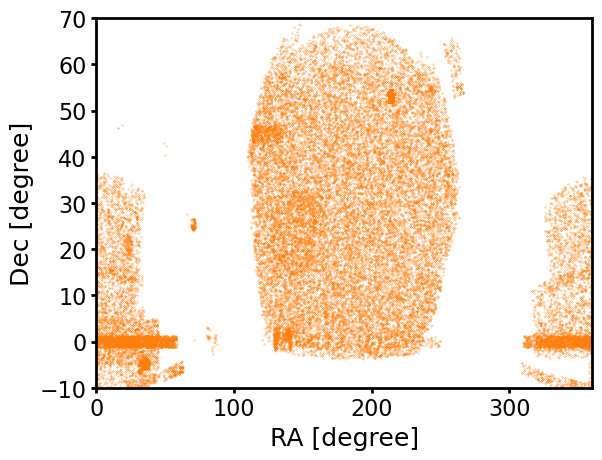

In [233]:
plt.scatter(agn_df.ra, agn_df.dec, s=0.05, c='C1')
plt.xlim([0,360])
plt.ylim([-10.0, 70.0])
plt.xlabel('RA [degree]')
plt.ylabel('Dec [degree]')

In [235]:
upper_dec = 40.0
lower_dec = 10.0
right_ra  = 200.0
left_ra   = 150.0
good_area = np.where((agn_df.ra <= right_ra) & (agn_df.ra >= left_ra) & (agn_df.dec >= lower_dec) & (agn_df.dec <= upper_dec))
ra_agn_good_area  = agn_df.ra.values[good_area] 
dec_agn_good_area = agn_df.dec.values[good_area] 
area_deg = 0.5*((right_ra - left_ra)*np.cos(lower_dec*np.pi/180.0) + (right_ra - left_ra)*np.cos(upper_dec*np.pi/180.0))*(upper_dec - lower_dec)
print(area_deg)

1313.1391470983897


3.3796875295405946


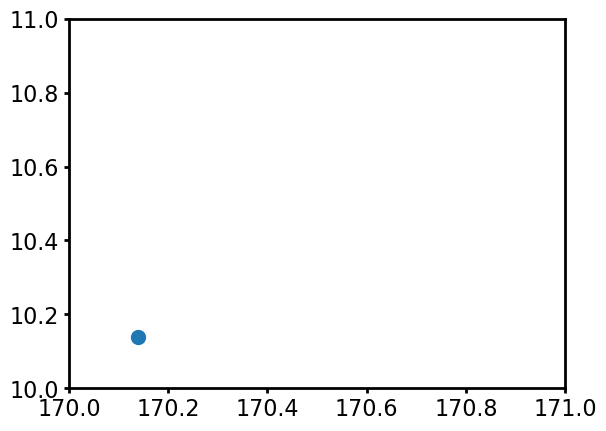

In [243]:
plt.scatter(ra_agn_good_area, dec_agn_good_area)
plt.ylim([10,11])
plt.xlim([170,171])
print(len(ra_agn_good_area)/area_deg)

In [245]:
print(np.cos(upper_dec*np.pi/180.0))

0.766044443118978


In [247]:
np.cos(lower_dec*np.pi/180.0)

0.984807753012208

In [313]:
bright_agn = np.where((agn_df.snMedian_i > 40.0) & (agn_df.i < 16.0) & (agn_df.redshift < 0.4))
#print(agn_df.i.values[bright_agn], agn_df.redshift.values[bright_agn], agn_df.fiberID.values[bright_agn], agn_df.plate.values[bright_agn], agn_df.mjd_plate.values[bright_agn])

print(len(bright_agn[0]))

329


NameError: name 'plate1' is not defined

In [275]:
i=200
bright_agn_spec = SDSS.get_spectra(plate=agn_df.plate.values[bright_agn][i], 
                                      mjd=agn_df.mjd_plate.values[bright_agn][i],
                                     fiberID=agn_df.fiberID.values[bright_agn][i])

In [572]:
bright_agn_spec[0][0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
TAI     =        4585903027.03 / 1st row - Number of seconds since Nov 17 1858  
RA      =            167.74858 / 1st row - Right ascension of telescope boresigh
DEC     =            11.981900 / 1st row - Declination of telescope boresight (d
EQUINOX =              2000.00 /                                                
RADECSYS= 'FK5     '           /                                                
TAIHMS  = '09:00:12.64'        / 1st row - TAI time (HH:MM:SS.SS) (TAI-UT = appr
TIMESYS = 'tai     '           / TAI, not UTC                                   
MJD     =                53078 / MJD of observation                             
MJDLIST = '53075 53078'     

In [307]:
print(bright_agn_spec[0][1].data['loglam'], bright_agn_spec[0][1].data['flux'], bright_agn_spec[0][1].data['ivar'], 
      bright_agn_spec[0][2].data['z'], agn_df.redshift.values[bright_agn][i])

[3.579  3.5791 3.5792 ... 3.9629 3.963  3.9631] [54.32495  56.751    62.39591  ... 67.487274 63.098976 66.37671 ] [0.02034269 0.02022538 0.01948592 ... 0.22482456 0.24363463 0.23093176] [0.04216975] 0.04216975


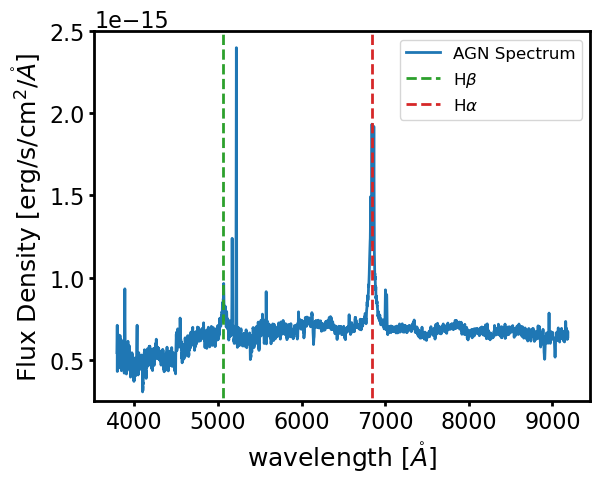

In [554]:
plt.plot(10.0**bright_agn_spec[0][1].data['loglam'], bright_agn_spec[0][1].data['flux']*1e-17, label='AGN Spectrum')
plt.plot([4861.0*(1.0 + bright_agn_spec[0][2].data['z']),4861.0*(1.0 + bright_agn_spec[0][2].data['z'])], [0,2.5e-15], ls='--', c='C2', label=r'H$\beta$')
plt.plot([6563.0*(1.0 + bright_agn_spec[0][2].data['z']),6563.0*(1.0 + bright_agn_spec[0][2].data['z'])], [0,2.5e-15], ls='--', c='C3', label=r'H$\alpha$')
plt.ylim([0.25e-15,2.5e-15])
plt.xlabel(r'wavelength [$\mathring{A}$]')
plt.ylabel(r'Flux Density [erg/s/cm$^2$/$\mathring{A}$]')
plt.legend()

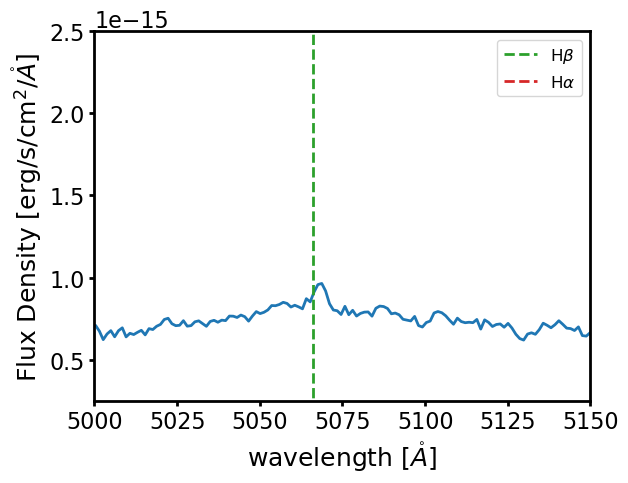

In [556]:
plt.plot(10.0**bright_agn_spec[0][1].data['loglam'], bright_agn_spec[0][1].data['flux']*1e-17)
plt.plot([4861.0*(1.0 + bright_agn_spec[0][2].data['z']),4861.0*(1.0 + bright_agn_spec[0][2].data['z'])], [0,2.5e-15], ls='--', c='C2', label=r'H$\beta$')
plt.plot([6563.0*(1.0 + bright_agn_spec[0][2].data['z']),6563.0*(1.0 + bright_agn_spec[0][2].data['z'])], [0,2.5e-15], ls='--', c='C3', label=r'H$\alpha$')
plt.ylim([0.25e-15,2.5e-15])
plt.xlim([5000.0,5150.0])
plt.xlabel(r'wavelength [$\mathring{A}$]')
plt.ylabel(r'Flux Density [erg/s/cm$^2$/$\mathring{A}$]')
plt.legend()

In [558]:
wvl_agn = 10.0**bright_agn_spec[0][1].data['loglam']
flux_agn = bright_agn_spec[0][1].data['flux']*1.0e-17
flux_err = np.sqrt(bright_agn_spec[0][1].data['ivar'])*1.0e-17
#centroid_guess = 6563.0*(1.0 + bright_agn_spec[0][2].data['z'])[0]
centroid_guess = 4861.0*(1.0 + bright_agn_spec[0][2].data['z'])[0]

start_wvl = np.where(np.absolute(centroid_guess - 100.0 - wvl_agn) == np.min(np.absolute(centroid_guess - 100.0 - wvl_agn)))[0][0]
end_wvl   = np.where(np.absolute(centroid_guess + 100.0 - wvl_agn) == np.min(np.absolute(centroid_guess + 100.0 - wvl_agn)))[0][0]                     

print(start_wvl, end_wvl)

def gaussian_profile_single(x, centroid, height, sigma, base):
    y = height*np.exp(-1.0*((x - centroid)/(sigma))**2.0) + base
    return y      

1170 1342


In [560]:
print(flux_err)

[1.4262781e-18 1.4221596e-18 1.3959197e-18 ... 4.7415668e-18 4.9359356e-18
 4.8055360e-18]


In [562]:
popt_apha, pcov_alpha = curve_fit(gaussian_profile_single, wvl_agn[start_wvl: end_wvl], flux_agn[start_wvl: end_wvl], sigma=flux_err[start_wvl: end_wvl], absolute_sigma=True,
                                  p0=[centroid_guess,1.0e-17,10.0,1.0e-17],
                                  bounds=((centroid_guess - 50.0, 1.0e-17, 1.0, 1.0e-17),
                                          (centroid_guess + 50.0, 1.0e-13, 100.0, 1.0e-13)), maxfev=5000)

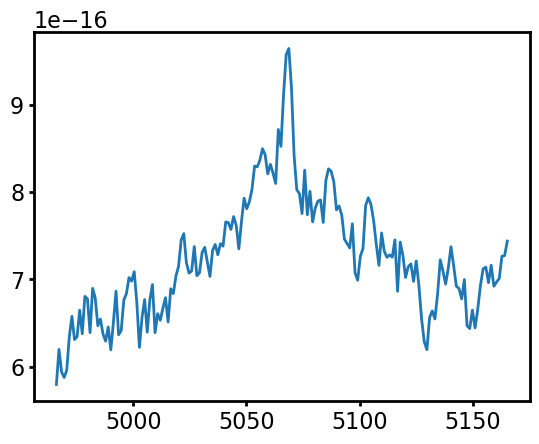

In [564]:
plt.plot(wvl_agn[start_wvl: end_wvl], flux_agn[start_wvl: end_wvl])

In [566]:
print(popt_apha)
#popt_apha[3] = 0.0
#print(popt_apha)


[5.06915562e+03 1.72936611e-16 3.62125036e+01 6.69114033e-16]


In [568]:
print(bright_agn_spec[0][1].data['flux']*1.0e-17)

[5.4324950e-16 5.6751001e-16 6.2395909e-16 ... 6.7487271e-16 6.3098973e-16
 6.6376710e-16]


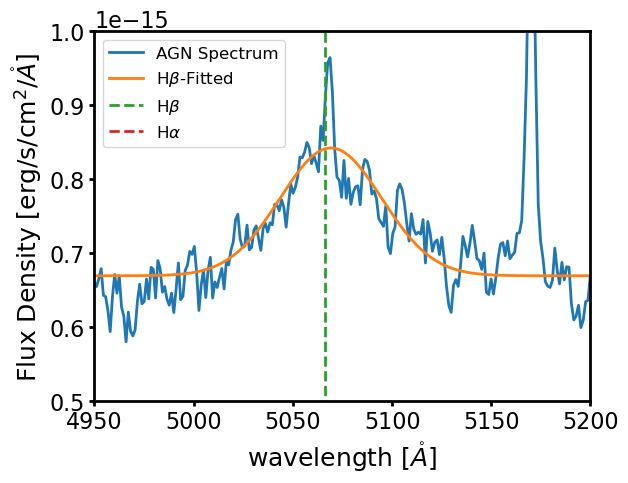

In [570]:
plt.plot(10.0**bright_agn_spec[0][1].data['loglam'], bright_agn_spec[0][1].data['flux']*1e-17, label='AGN Spectrum')
plt.plot(10.0**bright_agn_spec[0][1].data['loglam'], gaussian_profile_single(10.0**bright_agn_spec[0][1].data['loglam'], *popt_apha), label=r'H$\beta$-Fitted')
plt.plot([4861.0*(1.0 + bright_agn_spec[0][2].data['z']),4861.0*(1.0 + bright_agn_spec[0][2].data['z'])], [0,2.5e-15], ls='--', c='C2', label=r'H$\beta$')
plt.plot([6563.0*(1.0 + bright_agn_spec[0][2].data['z']),6563.0*(1.0 + bright_agn_spec[0][2].data['z'])], [0,2.5e-15], ls='--', c='C3', label=r'H$\alpha$')
plt.ylim([0.5e-15,1.0e-15])
plt.xlim([4950.0,5200.0])
plt.xlabel(r'wavelength [$\mathring{A}$]')
plt.ylabel(r'Flux Density [erg/s/cm$^2$/$\mathring{A}$]')
plt.legend()